In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Open Spam data. 
# Message content -> features
# ham/spam -> labels

import os

with open(os.path.join("datasets", "smsspam", "SMSSpamCollection")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

text = [x[1] for x in lines]
y = [int(x[0] == "spam") for x in lines]

In [5]:
text[:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, $1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea $900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [6]:
y[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [7]:
print 'number of ham and spam messages:', np.bincount(y)

number of ham and spam messages: [4827  747]


In [8]:
type(text)

list

In [9]:
type(y)

list

In [10]:
# Next split the data set into Training and Testing parts

from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y,
                                                         random_state=42,
                                                         test_size=0.25,
                                                         stratify=y)

In [11]:
# Use CountVectorizer to parse text data into BagOfWords
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer defaults')
CountVectorizer()

CountVectorizer defaults


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [13]:
print(len(vectorizer.vocabulary_))

7453


In [14]:
X_train.shape

(4180, 7453)

In [15]:
print(vectorizer.get_feature_names()[:20])

[u'00', u'000', u'000pes', u'008704050406', u'0089', u'01223585236', u'01223585334', u'02', u'0207', u'02072069400', u'02073162414', u'02085076972', u'021', u'03', u'04', u'0430', u'05', u'050703', u'0578', u'06']


In [16]:
print(vectorizer.get_feature_names()[2000:2020])

[u'crammed', u'cramps', u'crap', u'crash', u'crashed', u'crashing', u'crave', u'craving', u'craziest', u'crazy', u'crazyin', u'crckt', u'cream', u'created', u'creative', u'credit', u'credited', u'credits', u'creep', u'creepy']


In [17]:
print(X_train.shape)
print(X_test.shape)

(4180, 7453)
(1394, 7453)


In [18]:
# Training a Classifier on Text Features

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# We can compute the score on the training set
clf.score(X_train, y_train)

0.99832535885167462

In [21]:
# Visualizing Import Features

def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot the coefficients
    plt.figure(figsize=(15,5))
    colors = ['red' if c<0 else 'blue' for c in coef[interesting_coefficients]]
    plt.bar(np.arange(50), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1,51), feature_names[interesting_coefficients], rotation=60, ha='right')

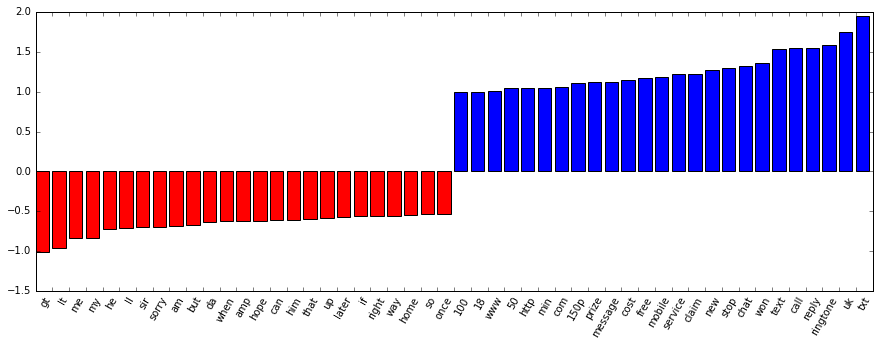

In [22]:
visualize_coefficients(clf, vectorizer.get_feature_names())

In [23]:
vectorizer = CountVectorizer(min_df=2)
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

clf = LogisticRegression()
clf.fit(X_train, y_train)

print clf.score(X_train, y_train)
print clf.score(X_test, y_test)

0.995454545455
0.98350071736


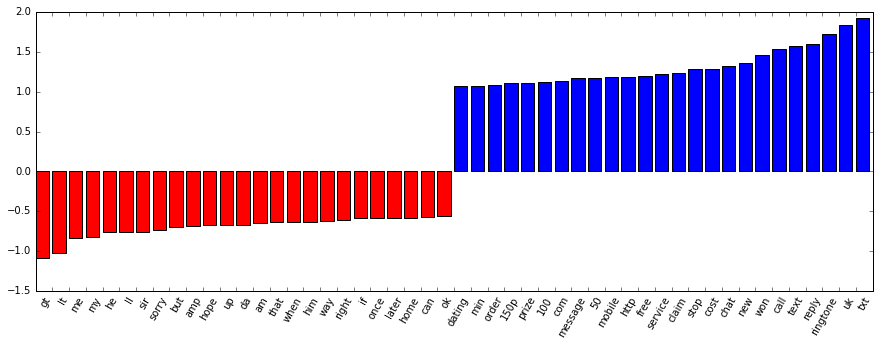

In [24]:
visualize_coefficients(clf, vectorizer.get_feature_names())